![](http://miro.medium.com/v2/resize:fit:1400/1*SjEGKrjDp7skk4URhzW5Nw.png)

# Bellabeat Project
# How can a wellness technology company act intelligently? 


![](http://bellabeat.com/wp-content/uploads/2022/04/IvyExpanded-1.png)


* [1. Summary](#1)
* [2. Ask](#2)
   * [2.1 Identification of the problems to be addressed](#2.1)
   * [2.2 Business task](#2.2) 
   * [2.3 Stakeholders](#2.3) 
* [3. Preparation](#3)
    * [3.1 Data storage](#3.1)
    * [3.2 Data accessibility and privacy](#3.2)
    * [3.3 Information on the dataset](#3.3)
    * [3.4 Organisation and verification of data](#3.4)
    * [3.5 Credibility and integrity of data](#3.5)
* [4. Process](#4)
    * [4.1 Package installation](#4.1)
    * [4.2 Opening library](#4.2)
    * [4.3 Dataset import](#4.3)
    * [4.4 Dataset Preview](#4.4)
* [5. Cleaning and Formatting](#5)
    * [5.1 Determination of the number of users](#5.1)
    * [5.2 Duplicates](#5.2)
    * [5.3 Consistency between date and time columns](#5.3)
    * [5.4 Merging of data sets](#5.4)
* [6. Analysis and Visualisation](#6)
    * [6.1 Type of users by level of activity](#6.1)
    * [6.2 Steps counted per day of the week](#6.2)
    * [6.3 Minutes slept by day of the week](#6.3)
    * [6.4 Steps per hour](#6.4)  
    * [6.5 Correlation sleep and steps per day](#6.5)  
    * [6.6 Correlation calories and steps per day](#6.6)  
    * [6.7 Correlation between minutes it takes users to fall asleep vs. daily steps](#6.7)  
    * [6.8 Days of smart device usage](#6.8)  
    * [6.9 Hours of smart device use](#6.9)
* [7. Conclusion (Action Phase)](#7)


# 1. Summary  <a class="anchor"  id="1"></a>

#### About the company
Bellabeat is a high-tech company of smart products focused on health. They have different smart devices, designed for women, that collect data on activity, sleep, stress and menstrual cycle. 
This project aims to analyse the data from the smart fitness devices to discover trends and thus guide the company's marketing strategy. 


Within the different products that the company has, we are going to focus on the Bellabeat application that collects data on activity, sleep, stress and menstrual cycle. These data are extracted from Bellabeat's different smart devices.



​
# 2. Ask <a class="anchor"  id="2"></a>

### 2.1 Identification of the problems to be addressed <a class="anchor"  id="2.1"></a>

- What are the trends in the use of smart devices?
- How could these trends apply to Bellabeat's customers?
- How could these trends influence Bellabeat's marketing strategy?


#### 2.2 Business task <a class="anchor"  id="2.2"></a>

Identify usage trends in the data provided by the products to provide recommendations for Bellabeat's marketing strategy.

#### 2.3 Stakeholders <a class="anchor"  id="2.3"></a>

Urška Sršen (Co-Founder of Bellabeat and Creative Director)
Sando Mur (Co-Founder of Bellabeat and key member of Bellabeat's executive team)


​
​

# 3. Preparation <a class="anchor"  id="3"></a>


#### 3.1 Data storage <a class="anchor"  id="3.1"></a>


The data source used is FitBit Fitness Tracker Data. This dataset is stored in Kaggle.

#### 3.2 Data accessibility and privacy <a class="anchor"  id="3.2"></a>

The open source dataset. It is in the public domain by waiving all its rights to it worldwide under copyright law, including all related and neighbouring rights, to the extent permitted by law. You may copy, modify, distribute and perform the work, including for commercial purposes, without seeking permission.

#### 3.3 Information on the dataset <a class="anchor"  id="3.3"></a>

Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate and sleep monitoring. Variation between output represents the use of different types of Fitbit trackers and individual tracking behaviours/preferences.

#### 3.4 Organisation and verification of data <a class="anchor"  id="3.4"></a>

The dataset is made up of 18 CSV documents. Each document has different quantitative data tracked by Fitbit.
 The data is long, as each row is a measure of time (a date and/or a time of day) per person, i.e. each person will have data in multiple rows. Each user has a unique ID and different rows as the data is tracked by day and time. The number of days of registration is 31 in a row.


#### 3.5 Credibility and integrity of data <a class="anchor"  id="3.5"></a>


The sample size is small (30 users). We have no information to affirm that the sample is representative of the population to be studied and the time limitation (2 months) we could encounter a sampling bias. Our case study will have an operational focus.


# 4. Process <a class="anchor"  id="4"></a>
The tool I will use is R, because of the amount of data in the case and to create visualisations for stakeholders.


#### 4.1 Package installation <a class="anchor"  id="4.1"></a>

The packages I will install are the following:

- tidyverse
- here
- skimr
- janitor
- lubridate
- ggplot2
- ggrepel

In [1]:

library("tidyverse")
library("here")
library("skimr")
library("janitor")
library("lubridate")
library("ggplot2")
library("ggrepel")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




#### 4.2 Opening library <a class="anchor"  id="4.2"></a>

In [2]:
list.files(path = "../input")

[1] "fitbit"

#### 4.3 Dataset import <a class="anchor"  id="4.3"></a>

The files we are going to import, because they are the most consistent for the analysis, are the following:

* daily_activity ( dailyActivity_merged )

* daily_sleep ( sleepDay_merged )

* daily_sleep ( hourlySteps_merged )


In [3]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

daily_sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

steps_hour <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

#### 4.4 Dataset Preview <a class="anchor"  id="4.4"></a>

In [4]:
head(daily_activity)
str(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [5]:
head(daily_sleep)
str(daily_sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [6]:
head(steps_hour)
str(steps_hour)

,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...


# 5. Cleaning and Formatting <a class="anchor"  id="5"></a>
 
 Next we will start with the data cleaning process to identify errors and inconsistencies.
 

#### 5.1 Determination of the number of users <a class="anchor"  id="5.1"></a>

First we will identify the number of users per data table. Statistically the minimum size of a sample population is 30, but for practical use we will keep the use of the daily_sleep table.

In [7]:
 n_unique(daily_activity$Id)

 n_unique(steps_hour$Id)

 n_unique(daily_sleep$Id)

[1] 33

[1] 33

[1] 24

#### 5.2 Duplicates <a class="anchor"  id="5.2"></a>

We will search for duplicates in the selected data tables and delete them together with the N/A.

In [8]:
sum(duplicated(daily_activity))

sum(duplicated(daily_sleep))

sum(duplicated(steps_hour))

[1] 0

[1] 3

[1] 0

In [9]:
daily_activity <- daily_activity %>%
drop_na() %>%
distinct()

daily_sleep <- daily_sleep %>%
drop_na() %>%
distinct()

steps_hour <- steps_hour %>%
drop_na %>%
distinct()

* We verify that the clean data table Dream_daily does not contain any more duplicates.

In [10]:
sum(duplicated(daily_sleep))

[1] 0

#### 5.3 Consistency between date and time columns <a class="anchor"  id="5.3"></a>

Next we are going to change the character format to date, and date-time in the three data tables.

In [11]:
activity <- daily_activity %>% 
  rename(Date = ActivityDate) %>% 
  mutate(Date = as_date(Date, format = "%m/%d/%Y"))

sleep <- daily_sleep %>% 
  rename(Date = SleepDay) %>% 
  mutate(Date = as.POSIXct(Date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

steps <- steps_hour %>% 
  rename(Date = ActivityHour) %>% 
  mutate(Date = as.POSIXct(Date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

* We perform a visual check on our clean datasets.

In [12]:
head(activity)
head(sleep)
head(steps)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<dttm>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


,Id,Date,StepTotal
,<dbl>,<dttm>,<int>
1,1503960366,2016-04-12 00:00:00,373
2,1503960366,2016-04-12 01:00:00,160
3,1503960366,2016-04-12 02:00:00,151
4,1503960366,2016-04-12 03:00:00,0
5,1503960366,2016-04-12 04:00:00,0
6,1503960366,2016-04-12 05:00:00,0


 #### 5.4 Merging of data sets <a class="anchor"  id="5.4"></a>
 
We will merge activity and sleep to see if there is correlation between the variables using "Id" and "Date" as primary keys.

In [13]:
activity_sleep <- merge(activity, sleep,  by=c ("Id", "Date"))

head(activity_sleep)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


# 6. Analysis and Visualisation <a class="anchor"  id="6"></a>

We will analyse user usage trends to focus on influencing the course of Bellabeat's marketing strategies.

#### 6.1 Type of users by level of activity <a class="anchor"  id="6.1"></a>


We will determine the type of users with the data we have, we will classify them by activity taking into account the daily number of steps. The criteria are based on the following article https://www.10000steps.org.au/articles/counting-steps/:

* Sedentary - Less than 5000 steps per day.
* Not very active - Between 5000 and 7499 steps per day.
* Active - Between 7500 and 9999 steps per day.
* Very active - More than 10000 steps per day.


To perform the classification, we will first group the daily data by user ID and calculate an average of steps taken per person, average calories and sleep, for further analysis.

In [14]:
daily_average <- activity_sleep %>%
group_by(Id) %>%
summarise(mean_steps = mean(TotalSteps), mean_calories = mean(Calories), mean_sleep = mean(TotalMinutesAsleep))

head(daily_average)

Id,mean_steps,mean_calories,mean_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000


In [15]:
user_type <- daily_average %>%
mutate (Type = case_when(
    mean_steps < 5000 ~ "Sedentary",
    mean_steps >= 5000 & mean_steps <= 7499 ~ "Not very active",
    mean_steps >= 7500 & mean_steps <= 9999 ~ "Active",
    mean_steps > 9999 ~ "Very Active") ) 

head(user_type)

Id,mean_steps,mean_calories,mean_sleep,Type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,Very Active
1644430081,7967.750,2977.750,294.0000,Active
1844505072,3477.000,1676.333,652.0000,Sedentary
1927972279,1490.000,2316.200,417.0000,Sedentary
2026352035,5618.679,1540.786,506.1786,Not very active
2320127002,5079.000,1804.000,61.0000,Not very active


* Now that we have a new column with the type of user we are going to create a data frame with the percentage of each type of user to visualise them in a graph.

In [16]:
user_percentage <- user_type %>%
group_by(Type) %>%
summarise(n = n()) %>%
mutate(percentage = n/sum(n))%>%
mutate(percent = scales::percent(percentage))


head(user_percentage)


Type,n,percentage,percent
<chr>,<int>,<dbl>,<chr>
Active,9,0.3750000,38%
Not very active,5,0.2083333,21%
Sedentary,5,0.2083333,21%
Very Active,5,0.2083333,21%


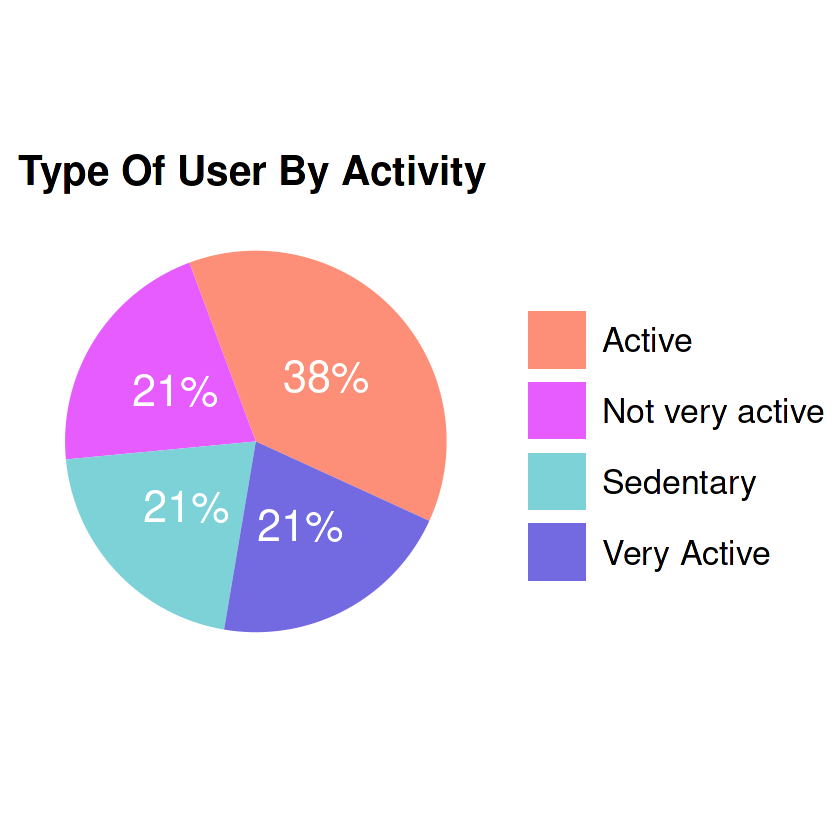

In [17]:
user_percentage %>%
  ggplot(aes(x="",y=percentage, fill=Type)) +
  geom_bar(stat = "identity", linewidth = 3 )+
  coord_polar("y", start=2)+
  theme_minimal()+
  theme(legend.text = element_text (size = 20),
        legend.title = element_blank(),
        legend.key.size = unit(1.5, units = "cm"),
        axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.1, size=24, face = "bold")) +
  scale_fill_manual(values = c("#fd8f78","#E65CFF", "#7CD2D7", "#7369E0")) +
  geom_text(aes(label = percent),
            position = position_stack(vjust = 0.5),color="white",size=9)+
  labs(title="Type Of User By Activity")

* The most frequent type of user in our sample is the active user.
* The other user types are equally divided.


#### 6.2 Steps counted per day of the week <a class="anchor"  id="6.2"></a>

We will now determine which days of the week users are most active.
We will also check if users walk the recommended amount of 7500 steps per day.
Then we calculate the days of the week based on the date. We are also calculating the average number of steps walked.

In [18]:
days_activity_sleep <- activity_sleep %>%
mutate(Days = weekdays (Date))

days_activity_sleep$Days <-ordered(days_activity_sleep$Days, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
"Friday", "Saturday", "Sunday"))


In [19]:
days_activity_sleep1 <- days_activity_sleep %>% 
  group_by(Days) %>%
  summarize(TotalSteps = mean(TotalSteps),TotalSleep = mean(TotalMinutesAsleep))

head(days_activity_sleep1)

Days,TotalSteps,TotalSleep
<ord>,<dbl>,<dbl>
Monday,9273.217,419.5000
Tuesday,9182.692,404.5385
Wednesday,8022.864,434.6818
Thursday,8183.516,401.2969
Friday,7901.404,405.4211
Saturday,9871.123,419.0702


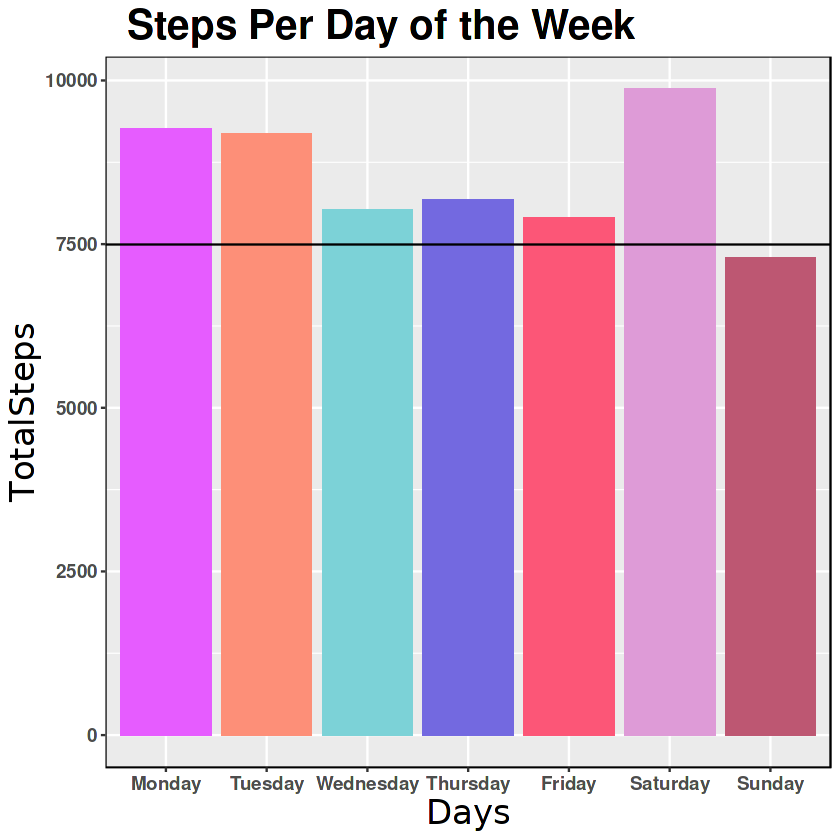

In [40]:
days_activity_sleep1%>%
ggplot( aes(x=Days, y=TotalSteps, fill=Days)) +
    geom_bar(stat="identity")+
    labs(title="Steps Per Day of the Week")+
    geom_hline(yintercept = 7500) +
    theme(legend.text = element_text (),
        legend.title = element_blank(),
        legend.position = "none",
        axis.title.x = element_text(family='Anton', hjust=0.5, size=20),
        axis.title.y = element_text(family='Anton', hjust=0.5, size=20),
        axis.text = element_text(size = 11, face = "bold"), 
        panel.border = element_rect(colour = "black", fill=NA),
        plot.title = element_text(hjust = 0.1, size=24, face = "bold"))+
        scale_fill_manual(values=c("#E65CFF","#FD8F78","#7CD2D7","#7369E0","#FC5677","#DE9BD7","#BD5772"))

Looking at the graph we can determine the following:
* The day with the highest average number of steps is Saturday.
* Users reach the recommended average number of steps per day, every day of the week, except on Sundays when the average number of steps is 7297.855, that is 2.70% less than the recommended number of steps.

#### 6.3 Minutes slept by day of the week <a class="anchor"  id="6.3"></a>

We will identify how users sleep on different days of the week and whether they sleep the recommended amount of sleep, which is 480 minutes a day, or 8 hours.

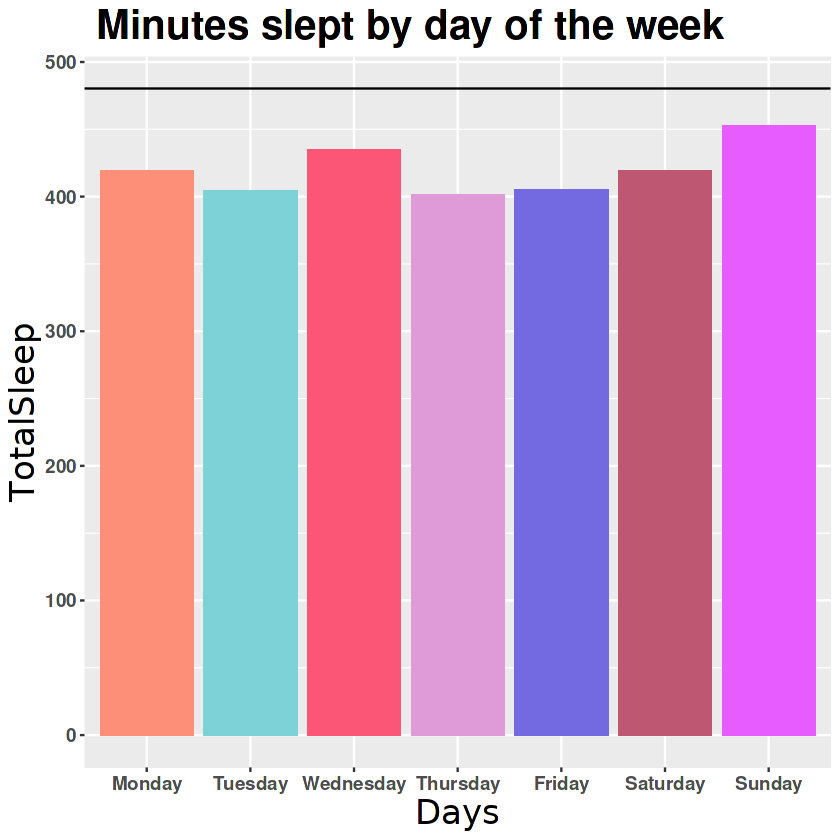

In [39]:
days_activity_sleep1 %>%
ggplot( aes(x=Days, y=TotalSleep, fill=Days)) +
    geom_bar(stat="identity") + 
    labs(title="Minutes slept by day of the week")+
   geom_hline(yintercept = 480) +
    theme(legend.text = element_text (),
        legend.title = element_blank(),
        legend.position = "none",
        axis.text = element_text(size = 11, face = "bold"),
        axis.title.x = element_text(family='Anton', hjust=0.5, size=20),
        axis.title.y = element_text(family='Anton', hjust=0.5, size=20),
        plot.title = element_text(hjust = 0.1, size=24, face = "bold"))+
    scale_fill_manual(values=c("#FD8F78", "#7CD2D7","#FC5677","#DE9BD7","#7369E0","#BD5772","#E65CFF"))

Looking at the graph we can determine the following:
* Users do not sleep the recommended number of minutes per day on any day of the week.
* The day they sleep the most is Sunday, but still do not reach 480 minutes.
* The day they sleep the most coincides with the day with the least amount of steps.
* There are no large fluctuations over the days.

#### 6.4 Steps per hour <a class="anchor"  id="6.4"></a>


For a more in-depth analysis, we will graph the number of steps made throughout the day, in order to identify the times of day when users are most active. To do this we will use the table "steps" in which we will find the steps by date, which we will divide into date and another column hour.

In [22]:
steps1 <- steps %>%
separate(Date, into=c("Date", "Hour"),sep =" " ) %>%
group_by(Hour) %>%
summarize(TotalSteps= mean(StepTotal))

steps2 <- steps1 %>%
separate(Hour, into=c("Hour", "Minute"),sep =":00:00") %>%
select(Hour,TotalSteps)
head(steps2)

Hour,TotalSteps
<chr>,<dbl>
00,42.188437
01,23.102894
02,17.110397
03,6.426581
04,12.699571
05,43.869099


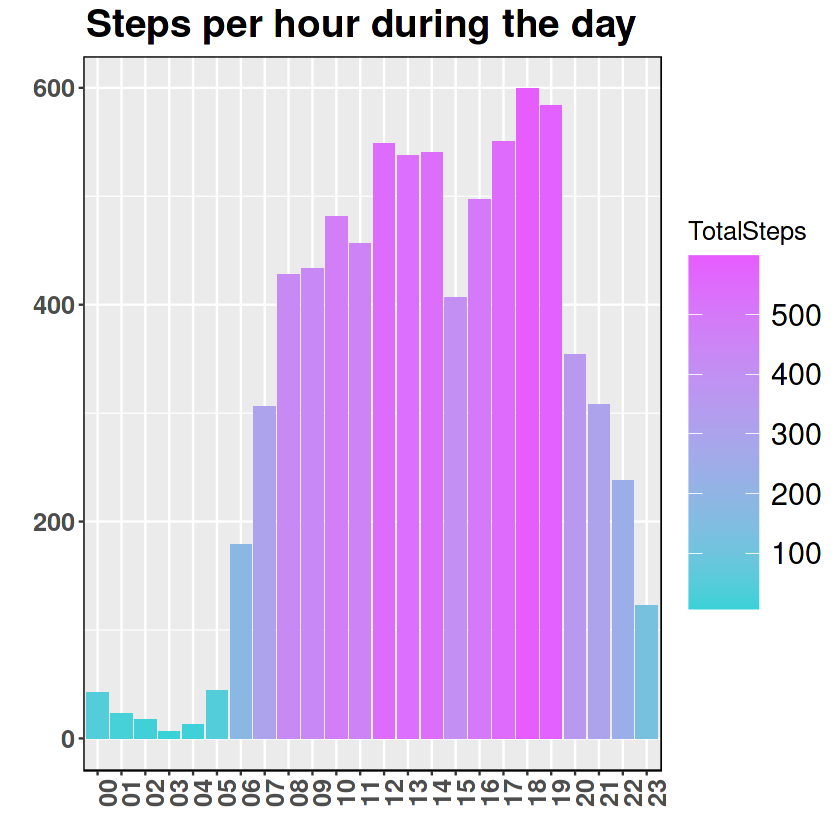

In [23]:
steps2 %>%
ggplot() +
  geom_col(mapping = aes(x=Hour, y=TotalSteps, fill=TotalSteps)) + 
  labs(title = "Steps per hour during the day", x="", y="") + 
  scale_fill_gradient(low ="#39D2D7", high ="#E65CFF")+
  theme(axis.text.x = element_text(angle = 90),
        legend.text = element_text (size = 18),
        legend.title = element_text(size = 15, face = 1),
        axis.text = element_text(size = 15, face = "bold"),
        legend.key.size = unit(1.5, units = "cm"),
        panel.border = element_rect(colour = "black", fill=NA),
        plot.title = element_text(hjust = 0.1, size=23, face = "bold"))

Looking at the graph we can determine the following:
* Users make the highest average number of steps per hour at 18:00.
* It is observed that users are most active between 8 am and 7 pm.

#### 6.5 Correlation between sleep and steps per day <a class="anchor"  id="6.5"></a> 

* We will now determine the level of correlation between sleep time and daily steps, to determine whether the physical activity of our users improves the amount of sleep and vice versa.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


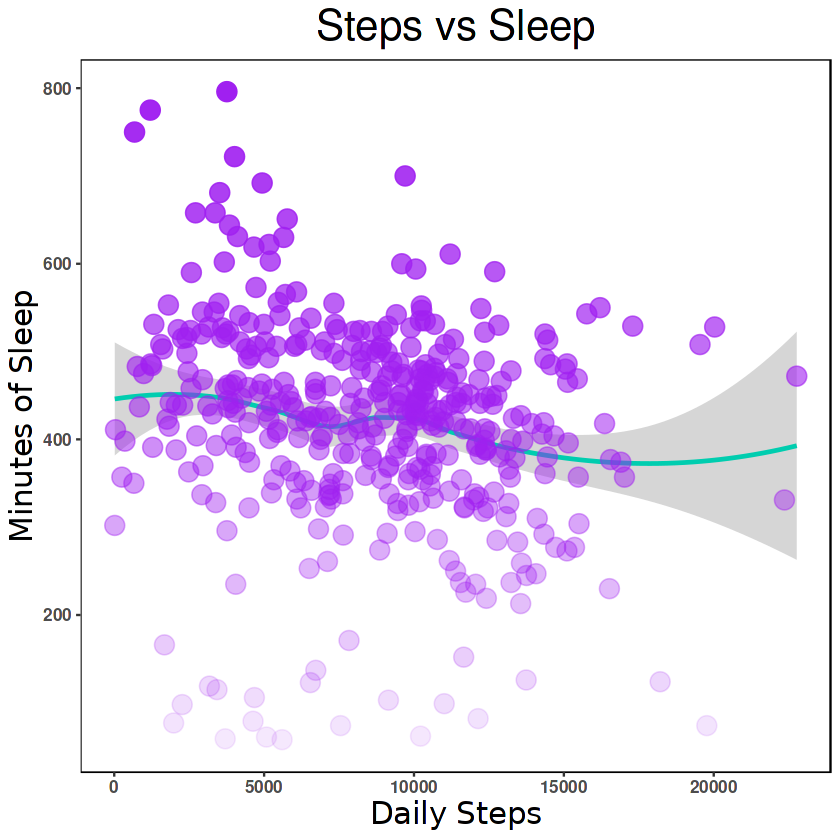

In [24]:
ggplot(data=activity_sleep)+
 geom_smooth(mapping=aes(x=TotalSteps, y=TotalMinutesAsleep),color ="#00CDAF")+
 geom_point(mapping=aes(x=TotalSteps, y=TotalMinutesAsleep, alpha=TotalMinutesAsleep),color="purple", size=5)+
 labs(title = "Steps vs Sleep", x = "Daily Steps", y= "Minutes of Sleep") +
   theme(panel.background = element_blank(),
        plot.title = element_text(size=25, hjust=0.5),
        axis.text = element_text(size = 10, face = "bold"),
        axis.title.x = element_text(family='Anton', hjust=0.5, size=18),
        axis.title.y = element_text(family='Anton', hjust=0.5, size=18),
        panel.border = element_rect(colour = "black", fill=NA),
        legend.position = "none")

In [25]:
cor.test(activity_sleep$TotalSteps, activity_sleep$TotalMinutesAsleep, method = 'pearson', conf.level = 0.95)


	Pearson's product-moment correlation

data:  activity_sleep$TotalSteps and activity_sleep$TotalMinutesAsleep
t = -3.9164, df = 408, p-value = 0.0001054
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.28199288 -0.09525253
sample estimates:
       cor 
-0.1903439 


* The correlation coefficient is less than 0, showing a slight negative slope in the graph. Thus, we can state that there is a small negative relationship between the number of steps and minutes of sleep per day.
* With a confidence level of 95%, the correlation between the variables is -0.19. This means that there is a weak relationship between the variables.
 
* **There is not enough correlation between the variables to say that an increase in the number of steps will lead to an increase in the number of hours of sleep.**



#### 6.6 Correlation between calories and daily steps <a class="anchor"  id="6.6"></a> 

It is a fact that physical activity burns calories. We will analyse the correlation of the variables calories burned and daily steps, in our data collected by smart devices.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


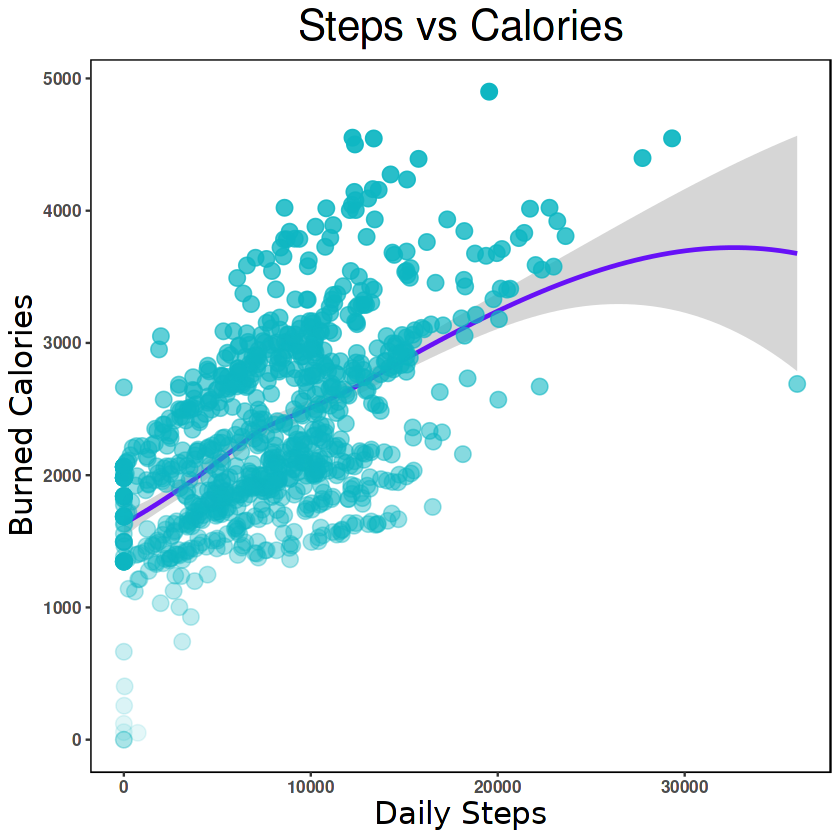

In [26]:
ggplot(data=activity)+
 geom_smooth(mapping=aes(x=TotalSteps, y=Calories),color ="#6711F7")+
 geom_point(mapping=aes(x=TotalSteps, y=Calories, alpha=Calories),color="#0EB6C2", size=4)+
 labs(title = "Steps vs Calories", x = "Daily Steps", y= "Burned Calories") +
   theme(panel.background = element_blank(),
        plot.title = element_text(size=25, hjust=0.5),
        axis.text = element_text(size = 10, face = "bold"),
        axis.title.x = element_text(family='Anton', hjust=0.5, size=18),
        axis.title.y = element_text(family='Anton', hjust=0.5, size=18),
        panel.border = element_rect(colour = "black", fill=NA),
        legend.position = "none",)

In [27]:
cor.test(activity$TotalSteps,activity$Calories, method = 'pearson', conf.level = 0.95)


	Pearson's product-moment correlation

data:  activity$TotalSteps and activity$Calories
t = 22.472, df = 938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5483688 0.6316184
sample estimates:
      cor 
0.5915681 


* The correlation coefficient is greater than 0, showing a positive slope in the graph. Thus, we can state that there is a positive relationship between the number of steps and calories burned per day.
* At a confidence level of 95%, the correlation between the variables is 0.60. This means that there is a strong relationship between the variables.
 
* **There is sufficient correlation between the variables to state that an increase in the number of steps will increase the amount of calories burned.**

#### 6.7 Correlation between minutes it takes for users to fall asleep vs daily steps <a class="anchor"  id="6.7"></a> 

Next we will evaluate the correlation between the steps taken by users in a day and the time it takes them to fall asleep.
To do this, we subtract "Total Time In Bed" minus "Total Minutes Asleep". With this result we will calculate the level of correlation between the number of daily steps.

In [28]:
steps_sleep <- activity_sleep %>%
mutate(minutes_taken = TotalTimeInBed - TotalMinutesAsleep)%>%
select(Id,minutes_taken,TotalSteps,TotalTimeInBed)

head(steps_sleep)
summarise(steps_sleep,avg_minutes_taken = mean(minutes_taken))

,Id,minutes_taken,TotalSteps,TotalTimeInBed
,<dbl>,<int>,<int>,<int>
1,1503960366,19,13162,346
2,1503960366,23,10735,407
3,1503960366,30,9762,442
4,1503960366,27,12669,367
5,1503960366,12,9705,712
6,1503960366,16,15506,320


avg_minutes_taken
<dbl>
39.30976


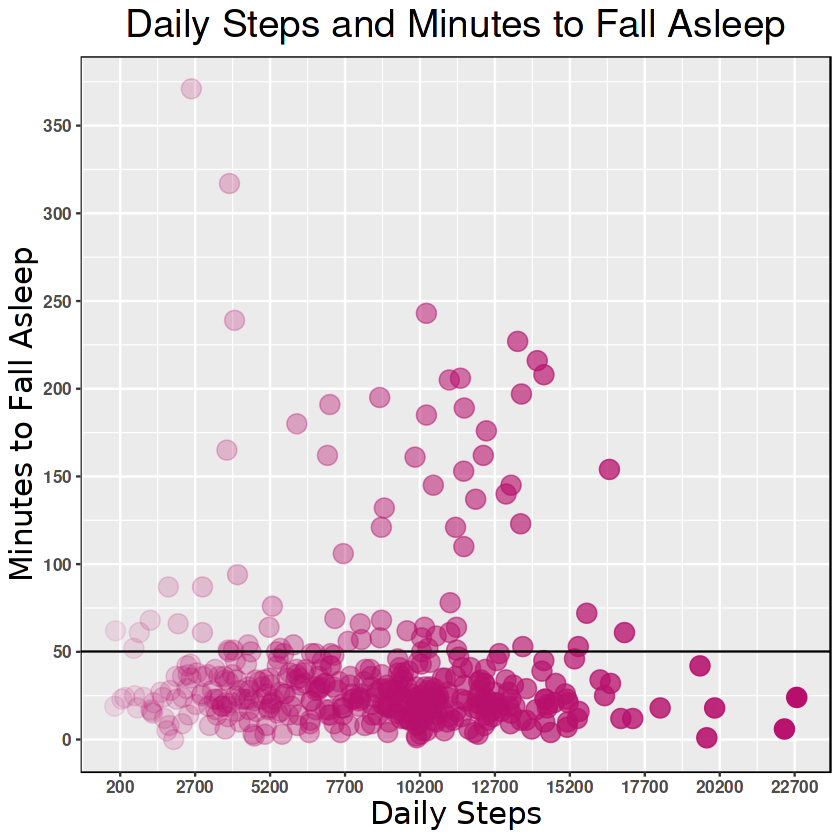

In [29]:
ggplot(data=steps_sleep)+
 geom_point(mapping=aes(x=TotalSteps, y=minutes_taken, alpha=TotalSteps),color="#B7106C", size=5)+
 labs(title = "Daily Steps and Minutes to Fall Asleep", x = "Daily Steps", y= "Minutes to Fall Asleep") +
 scale_y_continuous(breaks = seq(0,500, by = 50))+
 scale_x_continuous(breaks = seq(200,50000, by = 2500))+
 geom_hline(yintercept = 50) +
   theme(plot.title = element_text(size=23, hjust=0.5),
        axis.text = element_text(size = 10, face = "bold"),
        axis.title.x = element_text(family='Anton', hjust=0.5, size=18),
        axis.title.y = element_text(family='Anton', hjust=0.5, size=18),
        panel.border = element_rect(colour = "black", fill=NA),
        legend.position = "none",)

In [30]:
cor.test(steps_sleep$TotalSteps,steps_sleep$minutes_taken, method = 'pearson', conf.level = 0.95)


	Pearson's product-moment correlation

data:  steps_sleep$TotalSteps and steps_sleep$minutes_taken
t = 0.60329, df = 408, p-value = 0.5467
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06718754  0.12633605
sample estimates:
       cor 
0.02985402 


* The correlation coefficient is slightly greater than 0, showing a slight positive slope in the graph. Thus, we can say that there is a positive relationship between the number of steps and the minutes to fall asleep.
* With a confidence level of 95%, the correlation between the variables is 0.030. This means that there is a slight positive relationship between the variables.
* **There is not enough correlation between the variables to affirm that an increase in the number of steps taken in a day will change the number of minutes it takes for users to fall asleep.**
* Users take an average of 40 minutes to fall asleep.
* We can see in the graph cases of insomnia among the users in the sample.

#### 6.8 Days of smart device use <a class="anchor"  id="6.8"></a> 

We are going to analyse the frequency of use of smart devices of the users in our sample. 
We will calculate the number of users who used their smart device daily, classifying our sample into three categories knowing that the maximum is 31 days:

* High: users who used their device between 21 and 31 days.
* Medium: users who used their device between 10 and 20 days.
* Low: users who used their device between 1 and 10 days.

To do this we will create a new data frame grouping by Id, calculating the number of days of use and their respective classification.

In [31]:
days_of_use <- activity_sleep %>%
group_by(Id) %>%
summarise(total_days = sum(n())) %>%
mutate (daily_use = case_when(
    total_days >= 21 & total_days <= 31 ~ "High",
    total_days >= 11 & total_days <= 20 ~ "Medium",
    total_days >= 1 & total_days <= 10 ~ "Low") )

head(days_of_use) 

Id,total_days,daily_use
<dbl>,<int>,<chr>
1503960366,25,High
1644430081,4,Low
1844505072,3,Low
1927972279,5,Low
2026352035,28,High
2320127002,1,Low


In [32]:
avg_days_of_use <- days_of_use %>%
group_by(daily_use) %>%
summarise(n = n()) %>%
mutate(percentage = n/sum(n))%>%
mutate(percent = scales::percent(percentage))


head(avg_days_of_use)

daily_use,n,percentage,percent
<chr>,<int>,<dbl>,<chr>
High,12,0.500,50%
Low,9,0.375,38%
Medium,3,0.125,12%


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


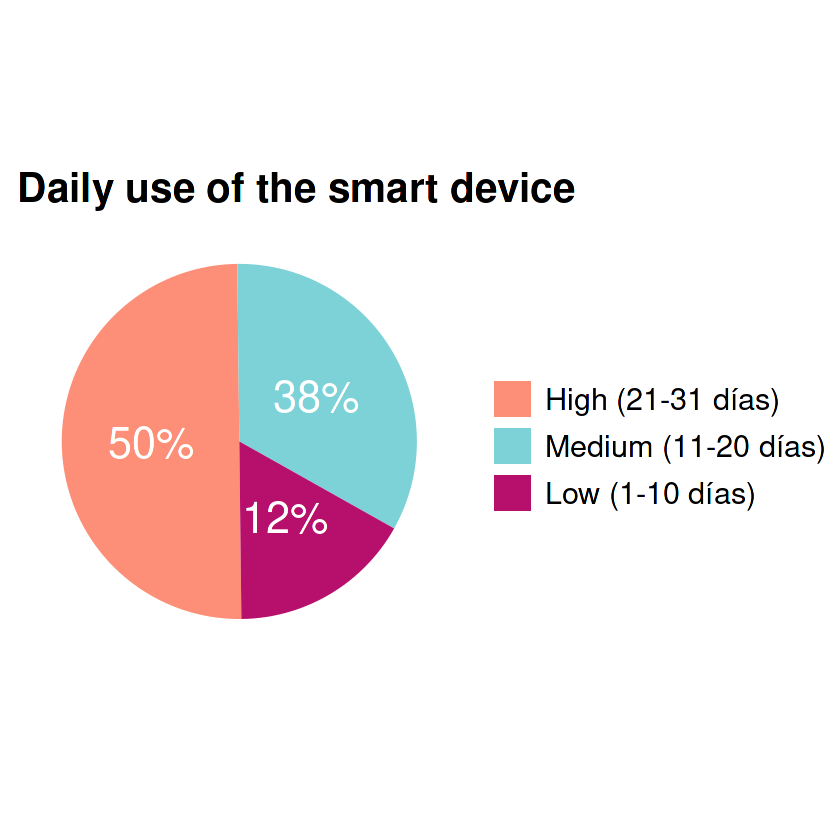

In [33]:
avg_days_of_use %>%
  ggplot(aes(x="",y=percent, fill=daily_use)) +
  geom_bar(stat = "identity", width = 20, size = 10,)+
  coord_polar("y", start=3.13)+
  theme_minimal()+
  theme(legend.text = element_text (size = 18),
        legend.title = element_blank(),
        legend.key.size = unit(1, units = "cm"),
        axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0, size=24, face = "bold")) +
  scale_fill_manual(values = c("#fd8f78","#7CD2D7", "#B7106C"), 
                    labels = c("High (21-31 días)",
                               "Medium (11-20 días)",
                               "Low (1-10 días)")) +
  geom_text(aes(label = percent),
            position = position_stack(vjust = 0.5),color="white",size=9)+
  labs(title="Daily use of the smart device")

Analysing our results we can see that:

* 50% of users in our sample use their device frequently between 21 and 31 days.
* 12% use their device between 11 and 20 days.
* 38% of our sample use their device for no more than 10 days.

#### 6.9 Hours of smart device use <a class="anchor"  id="6.9"></a> 

We have already investigated the number of days users use the smart device, now we want to determine how many hours participants use the device, for this we will classify into 3 categories:

* All day 
* More than half a day 
* Less than half a day

In [34]:
merge_hours <- merge(activity, days_of_use, by=c ("Id"))

In [35]:
hour_use <- merge_hours %>%
mutate(minutes_use =(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes))%>%
mutate(percent_use= (minutes_use/1440)*100) %>%
mutate(label = case_when(
    percent_use == 100 ~ "All day",
    percent_use >= 50 & percent_use < 100 ~ "More than half day",
    percent_use < 50 & percent_use > 0 ~ "Less than half day")) %>%
select(Id, minutes_use,percent_use, label)


head(hour_use)

,Id,minutes_use,percent_use,label
,<dbl>,<int>,<dbl>,<chr>
1,1503960366,1091,75.76389,More than half day
2,1503960366,1073,74.51389,More than half day
3,1503960366,1044,72.50000,More than half day
4,1503960366,1015,70.48611,More than half day
5,1503960366,1094,75.97222,More than half day
6,1503960366,1033,71.73611,More than half day


In [36]:
label_hour <- hour_use %>%
group_by(label) %>%
summarise(n = n()) %>%
mutate(percentage = n/sum(n))%>%
mutate(percent = scales::percent(percentage))

head(label_hour) 

label,n,percentage,percent
<chr>,<int>,<dbl>,<chr>
All day,260,0.36465638,36%
Less than half day,25,0.03506311,4%
More than half day,428,0.60028050,60%


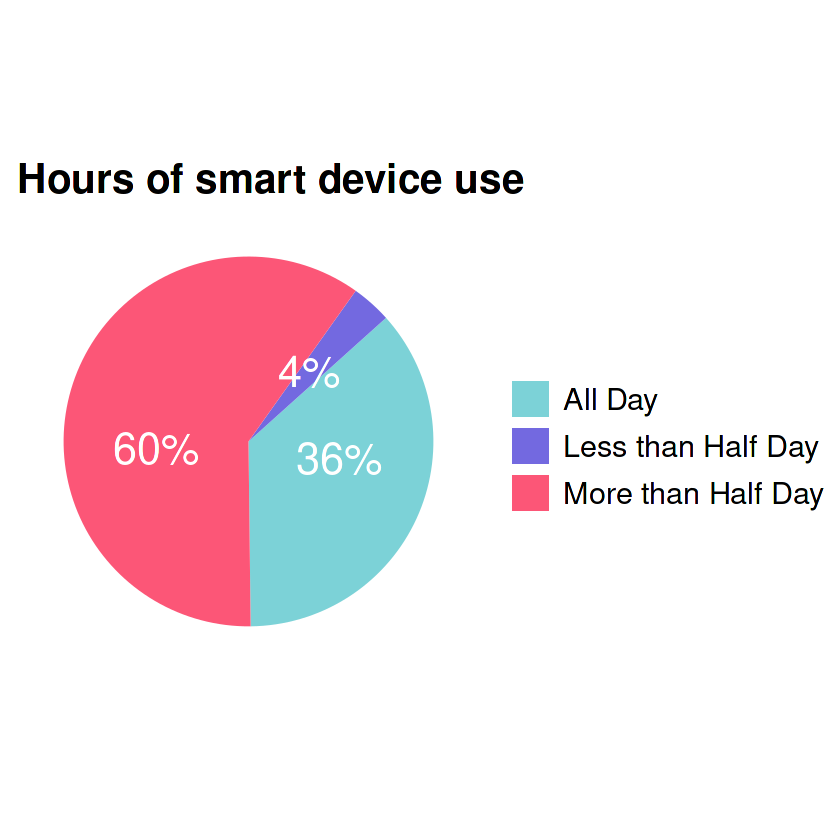

In [37]:
label_hour %>%
  ggplot(aes(x="",y=percentage, fill=label)) +
  geom_bar(stat = "identity", width = 20, size = 10,)+
  coord_polar("y", start=3.13)+
  theme_minimal()+
  theme(legend.text = element_text (size = 18),
        legend.title = element_blank(),
        legend.key.size = unit(1, units = "cm"),
        axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0, size=24, face = "bold")) +
  scale_fill_manual(values = c("#7CD2D7","#7369E0","#FC5677"), 
                    labels = c("All Day","Less than Half Day","More than Half Day")) +
  geom_text(aes(label = percent),
            position = position_stack(vjust = 0.4),color="white",size=9)+
  labs(title="Hours of smart device use")

After carrying out the above analysis we can affirm that:
* 60% of users wear the device for more than half a day.
* 36% of users wear their device all day long.
* 4% of users wear the device less than half a day.

# 7. Conclusion (Action Phase) <a class="anchor"  id="7"></a>

Bellabeat is a technology company on a mission to help women better understand how their bodies work and encourage them to make healthier choices. This project has the goal of analysing data from smart devices to discover trends and guide the company's marketing strategy. Based on the data collected and the information analysed, I have found different trends that can help improve the Bellabeat app and its online campaign:

#### Recommendations:

* We have classified users according to their number of daily and weekly steps, thanks to this we have seen that the average user reaches 7500 steps per day, except on Sundays, for this we can create **warning notifications in the application** in which they remember to maintain the level of activity.
* Another recommendation is the creation of a **points system** in the application, which accumulates points with the steps taken and can be exchanged for discounts in sportswear shops, discounts in gyms and discounts on the purchase of other Bellabeat products.
* After the analysis we were able to determine which were the times of greatest physical activity, so notifications can be made to encourage exercise at their most active times and **reminders that alert users before the times with the greatest activity.
* Thanks to the analysis we were able to determine that users do not reach the hours of sleep any day of the week, for this you can create a **sleep control** in which notifies the time to sleep and wake up programmed by the user.
* We have seen graphically that users take an average of 40 minutes to fall asleep, there are also users with insomnia, so my proposal is to add to the application useful resources such as **guided relaxation techniques and breathing techniques** to induce sleep.
* Another recommendation is to create **informative publications and awareness campaigns** on Bellabeat's social networks about the importance of sleep and physical activity. As well as the relationship between physical activity and calories burned.
* In terms of smart device usage we have identified that only 50% of users use their device between 21 and 31 days, only 36% of users wear their device all day. In order to increase these figures I propose to run an **advertising campaign on social networks** highlighting its: Water resistance, long battery life and its discreet and elegant design with the appearance of a bracelet for use on any occasion.
                                                                                                                           Sofia Heredia

![](http://cdn.create.vista.com/api/media/medium/65573895/stock-photo-runner-athlete-running-up-stairs?token=)